<P> <img src="https://i.ibb.co/gyNf19D/nhslogo.png" alt="nhslogo" border="0" width="100" align="right"><font size="6"><b> CS4132 Data Analytics</b> </font>

# Lab 8: Data Modelling

Complete the following questions and upload your `.ipynb` file to Coursemology.

Name the file in the following format:

`Lab<Num><YourName>.ipynb`

## Q1

We will use the used car dataset from the notes for this question.

In [1]:
import pandas as pd
import numpy as np
df = pd.read_csv("Lab8Q1.csv")
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000.0,21,27,13495.0
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000.0,21,27,16500.0
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500.0,18,22,17450.0


a) Draw a scatterplot to investigate the relationship between `highway-mpg` and the `price` of cars.

<AxesSubplot:xlabel='highway-mpg', ylabel='price'>

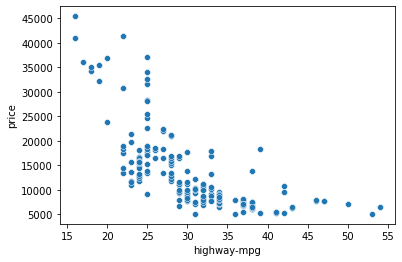

In [2]:
#your solution
import seaborn as sns
import matplotlib.pyplot as plt  
df['highway-mpg'] = df['highway-mpg'].replace('?','NaN')
df.dropna(subset=["highway-mpg", "price"], axis=0, inplace= True)  #handle na values in price
sns.scatterplot(y='price', x='highway-mpg', data=df)

b) Develop a SLRM for the data in (a) using `scikitlearn`. Ensure you split the dataset into training and test data.

In [3]:
#your solution
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split 
lm = LinearRegression()
X_train, X_test, y_train, y_test = train_test_split(df[['highway-mpg']], df['price'], test_size=0.2, random_state=3)
lm.fit(X_train, y_train)
print('yhat = ' + str(lm.coef_[0]) + 'highway-mpg + ' + str(lm.intercept_))

yhat = -742.9768296705888highway-mpg + 35992.14277164267


Hence, state the equation of your model.

#### yhat = -742.9768296705888highway-mpg + 35992.14277164267

c) Now, make predictions using your test data. Display the predicted results.

In [4]:
#your solution
yhat = lm.predict(X_test)
yhat

array([15188.79154087,  7759.02324416, 17417.72202988, 16674.74520021,
       12216.88422218, 12216.88422218,  8502.00007383, 23361.53666724,
       24104.51349691, 17417.72202988, 12216.88422218, 12216.88422218,
        7759.02324416, 12216.88422218, 10730.93056284, 18160.69885955,
        8502.00007383, 13702.83788153, 12959.86105185, 12216.88422218,
       19646.65251889, 17417.72202988, 15188.79154087, 17417.72202988,
       12959.86105185, 14445.8147112 , 18160.69885955, 13702.83788153,
       17417.72202988,  8502.00007383, 17417.72202988, 12959.86105185,
       10730.93056284, 10730.93056284, 11473.90739251, 14445.8147112 ,
       19646.65251889, 18160.69885955, 17417.72202988,  7016.04641449,
       15188.79154087])

d) Evaluate your model by plotting a scatter plot of Actual vs Predicted.

Text(0, 0.5, 'Predicted')

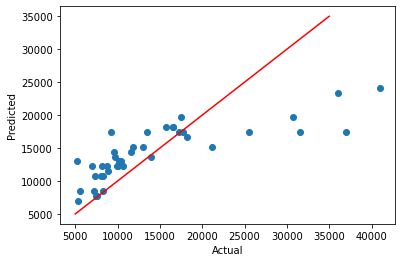

In [5]:
#your solution
dftmp = pd.DataFrame({'Actual': y_test, 'Predicted': yhat})
plt.scatter(y_test, yhat)
plt.plot([5000,35000], [5000,35000], color="red")
plt.xlabel('Actual')
plt.ylabel('Predicted')

State your observations.

#### When the actual price is low, the predicted value is an underestimate, however, when the price is high, the predicted value is an overestimation


e) Evaluate your model by plotting a residual plot.

<AxesSubplot:xlabel='highway-mpg', ylabel='price'>

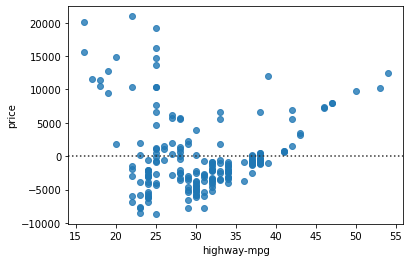

In [6]:
#your solution
sns.residplot(x=df['highway-mpg'], y=df['price'])

State your observations/conclusion.

#### It seems highly scattered, but there is a lot of underestimation intially, however eventually, it starts to overestimate


## Q2

We will use the data Lab8Q2.csv for this question. This dataset contains model-specific fuel consumption ratings and estimated carbon dioxide emissions for new light-duty vehicles for retail sale in Canada. 
-   **MODELYEAR** e.g. 2014
-   **MAKE** e.g. Acura
-   **MODEL** e.g. ILX
-   **VEHICLE CLASS** e.g. SUV
-   **ENGINE SIZE** e.g. 4.7
-   **CYLINDERS** e.g 6
-   **TRANSMISSION** e.g. A6
-   **FUEL CONSUMPTION in CITY(L/100 km)** e.g. 9.9
-   **FUEL CONSUMPTION in HWY (L/100 km)** e.g. 8.9
-   **FUEL CONSUMPTION COMB (L/100 km)** e.g. 9.2
-   **CO2 EMISSIONS (g/km)** e.g. 182   --> low --> 0


In [7]:
df = pd.read_csv("Lab8Q2.csv")
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


a) Perform relevant EDA for the following features: `ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS`

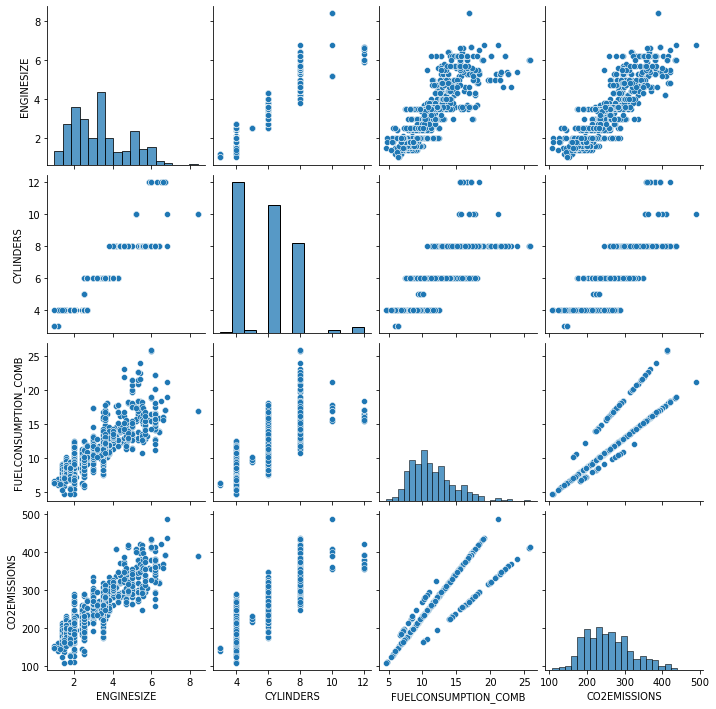

In [8]:
#your solution
dfsub = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
sns.pairplot(dfsub)

b) Based on the observations from (a), select a suitable feature and develop a SLRM to predict the CO2 emissions. Ensure you split the dataset into training and test data.

In [10]:
#your solution
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split 
lm = LinearRegression()
X_train, X_test, y_train, y_test = train_test_split(df[['ENGINESIZE']], df['CO2EMISSIONS'], test_size=0.2, random_state=3)
lm.fit(X_train, y_train)
print('yhat = ' + str(lm.coef_[0]) + 'ENGINESIZE + ' + str(lm.intercept_))

yhat = 39.21418570063751ENGINESIZE + 124.22009023348278


Hence, state the equation of your model.

#### yhat = 39.21418570063751ENGINESIZE + 124.22009023348278


c) Now, make predictions using your test data. Display the predicted results.

In [11]:
#your solution
yhat = lm.predict(X_test)
yhat

array([261.46974019, 265.39115876, 332.05527445, 186.96278735,
       261.46974019, 312.4481816 , 320.29101874, 218.33413592,
       320.29101874, 359.50520444, 186.96278735, 186.96278735,
       218.33413592, 241.86264734, 367.34804158, 218.33413592,
       202.64846163, 202.64846163, 241.86264734, 186.96278735,
       265.39115876, 218.33413592, 269.31257733, 202.64846163,
       261.46974019, 222.25555449, 222.25555449, 296.76250732,
       367.34804158, 320.29101874, 296.76250732, 179.11995021,
       194.80562449, 241.86264734, 390.876553  , 296.76250732,
       261.46974019, 194.80562449, 202.64846163, 328.13385588,
       265.39115876, 359.50520444, 202.64846163, 261.46974019,
       202.64846163, 304.60534446, 230.09839163, 261.46974019,
       202.64846163, 269.31257733, 375.19087872, 202.64846163,
       202.64846163, 320.29101874, 261.46974019, 292.84108875,
       249.70548448, 179.11995021, 332.05527445, 186.96278735,
       386.95513443, 186.96278735, 222.25555449, 202.64

e) Evaluate your model by plotting a residual plot.

<AxesSubplot:xlabel='ENGINESIZE', ylabel='CO2EMISSIONS'>

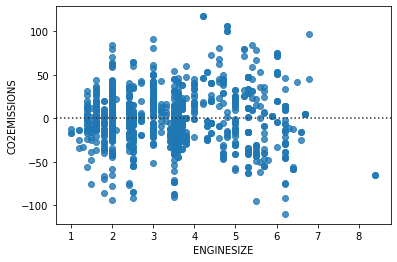

In [12]:
#your solution
sns.residplot(x=df['ENGINESIZE'], y=df['CO2EMISSIONS'])

State your observations/conclusion.

#### There is a lot of scattered data, and no clear trend can be seen


f) Calculate the MSE.

In [ ]:
#your solution
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, yhat)

g) Another common approach to analyze the model is to draw a scatterplot of Actual vs Predicted. Plot a scatterplot of Actual vs Predicted.

Text(0, 0.5, 'Predicted')

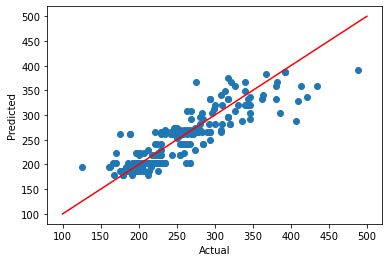

In [13]:
#your solution
dftmp = pd.DataFrame({'Actual': y_test, 'Predicted': yhat})
plt.scatter(y_test, yhat)
plt.plot([100,500], [100,500], color="red")
plt.xlabel('Actual')
plt.ylabel('Predicted')

What insights can you draw from the scatterplot?

#### There is a lot of overestimation from 200 onwards, compared to underestimation, however there are points on the red line.


## Q3

In reality, there are multiple variables that predict the Co2emission. When more than one independent variable is present, the process is called multiple linear regression. For example, predicting co2emission using FUELCONSUMPTION_COMB, EngineSize and Cylinders of cars. The good thing here is that Multiple linear regression is the extension of simple linear regression model.

a) Develop a MLRM using the 3 attributes stated above. Write the equation for the MLRM.

In [20]:
#your solution
mlm = LinearRegression()
X_train2, X_test2, y_train2, y_test2 = train_test_split(df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']], df['CO2EMISSIONS'], test_size=0.2, random_state=3)
mlm.fit(X_train2, y_train2)
print('yhat=',mlm.intercept_, " + " , mlm.coef_[0], 'ENGINESIZE + ',mlm.coef_[1],'CYLINDERS + ',mlm.coef_[0], 'FUELCONSUMPTION_COMB')

yhat= 64.81695713412932  +  11.535815350507972 ENGINESIZE +  7.1528837557527405 CYLINDERS +  11.535815350507972 FUELCONSUMPTION_COMB


#### yhat= 64.81695713412932  +  11.535815350507972 ENGINESIZE +  7.1528837557527405 CYLINDERS +  11.535815350507972 FUELCONSUMPTION_COMB

c) Now, make predictions using your test data. Display the predicted results.

In [21]:
#your solution
yhat2 = mlm.predict(X_test2)
yhat2

array([258.30135551, 277.66052922, 359.48663592, 191.41548885,
       248.71946489, 301.97651891, 305.24187104, 222.68248956,
       309.07462728, 377.96764951, 188.54092167, 188.54092167,
       215.97516612, 261.15714939, 308.54476978, 215.01697706,
       203.69532749, 184.53154625, 251.57525877, 189.49911073,
       261.37131517, 213.10059894, 267.31584201, 204.65351655,
       260.21773363, 216.1705586 , 204.67228985, 305.02770526,
       386.15808379, 384.77156317, 305.02770526, 184.31738047,
       181.26619412, 221.87139786, 417.92542019, 305.02770526,
       254.46859926, 199.47178629, 203.69532749, 366.88968753,
       287.24241984, 438.46769724, 205.61170561, 245.84489771,
       194.11343687, 292.9620324 , 238.59969197, 249.67765395,
       210.40265092, 261.56670764, 328.09933596, 209.44446186,
       218.06816342, 322.48927415, 261.1759227 , 302.02481402,
       267.29706871, 189.10832578, 341.28104375, 188.54092167,
       391.79185463, 191.41548885, 193.17402111, 206.56

d) Calculate the MSE.

In [22]:
#your solution
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test2, yhat2)

526.9538405354007

e) Evaluate the model by plotting a scatterplot of Actual vs Predicted.

Text(0, 0.5, 'Predicted')

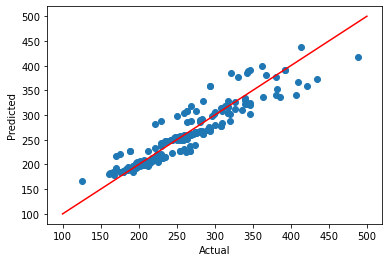

In [23]:
#your solution
dftmp = pd.DataFrame({'Actual': y_test2, 'Predicted': yhat2})
plt.scatter(y_test2, yhat2)
plt.plot([100,500], [100,500], color="red")
plt.xlabel('Actual')
plt.ylabel('Predicted')

What insights can you draw from the scatterplot?

#### The predicted data is somewhat accurate, with most overestimation and underestimation still being near the red line


f) Draw a distribution plot to show the predicted and actual for both SLRM and MLRM and compare the results.

<AxesSubplot:xlabel='CO2EMISSIONS', ylabel='Density'>

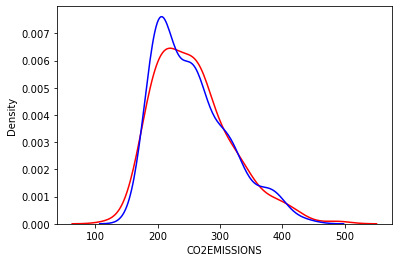

In [25]:
#your solution
sns.kdeplot(y_test2, color='r', label='Actual Value')
sns.kdeplot(yhat2,  color='b', label='Fitted Value')

<AxesSubplot:xlabel='CO2EMISSIONS', ylabel='Density'>

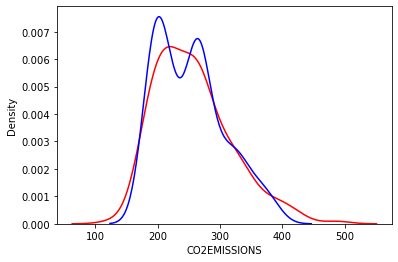

In [19]:
#your solution
sns.kdeplot(y_test, color='r', label='Actual Value')
sns.kdeplot(yhat,  color='b', label='Fitted Value')

What insights and conclusion can you draw from the distribution plots?

#### Both are very wavy and not exactly the actual distribution, however the first distribution seems more accurate 
